<a href="https://colab.research.google.com/github/Jelius47/Data_sci_w_jelius/blob/main/StockPriceEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Imporrting the dataset
def load_data():
  url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
  html =pd.read_html(url,header = 0)
  df = html[0]
  return df

In [ ]:
df = load_data()
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
## Examinig the sectors
sector_inique = df['GICS Sector'].unique()
sector_inique

array(['Industrials', 'Health Care', 'Information Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer Discretionary',
       'Real Estate', 'Communication Services', 'Consumer Staples',
       'Energy'], dtype=object)

In [ ]:
len(sector_inique)

11

In [ ]:
## Group by sector
sector = df.groupby('GICS Sector')

In [ ]:
## Showing only the first company for each of the eleven companies
sector.first()

,Symbol,Security,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
GICS Sector,,,,,,,
Communication Services,GOOGL,Alphabet Inc. (Class A),Interactive Media & Services,"Mountain View, California",2014-04-03,1652044,1998
Consumer Discretionary,ABNB,Airbnb,"Hotels, Resorts & Cruise Lines","San Francisco, California",2023-09-18,1559720,2008
Consumer Staples,MO,Altria,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,APA Corporation,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
Financials,AFL,Aflac,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
Industrials,MMM,3M,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
Information Technology,ACN,Accenture,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products and Chemicals,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [ ]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  22.0  1.150190e+06  503816.763824  29989.0  833146.75   
Consumer Discretionary  52.0  9.417031e+05  424437.605477  37996.0  820586.25   
Consumer Staples        38.0  4.932800e+05  659308.763424   7084.0   27947.75   
Energy                  22.0  8.334150e+05  654494.803186   4447.0   95502.00   
Financials              71.0  7.078688e+05  540475.681649   4962.0   76203.00   
Health Care             64.0  8.470838e+05  555260.595830   1800.0  312903.00   
Industrials             79.0  7.189539e+05  630227.703040   4281.0   76847.00   
Information Technology  65.0  8.799023e+05  491609.431945   2488.0  749251.00   
Materials               28.0  8.372840e+05  699283.185676   2969.0   67840.25   
Real Estate             31.0  9.564368e+05  373794.645688  34903.0  892604.00   
Utilities               31.0  8.730384e+05  477431.209001   4904.0  742555.00   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1564708.00  1754301.0  
Consumer Discretionary   943392.5  1202861.75  1590895.0  
Consumer Staples          78950.0   929235.25  1996862.0  
Energy                   946736.0  1477022.75  1841666.0  
Financials               874766.0  1137333.50  1633917.0  
Health Care              902936.5  1117319.50  1964738.0  
Industrials              746515.0  1196821.00  1996810.0  
Information Technology   883241.0  1274494.00  1730168.0  
Materials                915994.5  1419355.00  1755672.0  
Real Estate             1034054.0  1067255.50  1705696.0  
Utilities                922224.0  1078609.50  1868275.0

In [ ]:
## Examining data by sector
# Considering the health care system
sector.get_group('Health Care')

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999
15,ALGN,Align Technology,Health Care,Health Care Supplies,"Tempe, Arizona",2017-06-19,1097149,1997
33,AMGN,Amgen,Health Care,Biotechnology,"Thousand Oaks, California",1992-01-02,318154,1980
...,...,...,...,...,...,...,...,...
473,VTRS,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
486,WAT,Waters Corporation,Health Care,Life Sciences Tools & Services,"Milford, Massachusetts",2002-01-02,1000697,1958
490,WST,West Pharmaceutical Services,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
# Analysis of finance data
#!pip install yfinance

In [ ]:
# Importing libraries
import yfinance as yf

In [ ]:
# Observing the list of the symbols of S&P 500
list(df.Symbol)

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [ ]:

# # this will bring the ERROR
# # Retrieving stock data
# data = yf.download(
#     tickers=list(df.Symbol),  # List of ticker symbols from DataFrame
#     period='ytd',              # Period for the data (Year-To-Date)
#     interval='1d',             # Data interval (1 day)
#     group_by='ticker',         # Group by ticker symbol
#     auto_adjust=True,          # Automatically adjust for splits and dividends
#     prepost=True,              # Include pre and post market data
#     threads=True,              # Use multiple threads for downloading
#     proxy=None                 # Proxy settings (if needed)
# )


In [ ]:
def correct_tickers(tickers):
    return [ticker.replace('.', '-') for ticker in tickers]

# Corrected list of tickers
corrected_tickers = correct_tickers(df.Symbol)

# Retrieving stock data
data = yf.download(
    tickers=corrected_tickers,  # List of corrected ticker symbols
    period='ytd',               # Period for the data (Year-To-Date)
    interval='1d',              # Data interval (1 day)
    group_by='ticker',          # Group by ticker symbol
    auto_adjust=True,           # Automatically adjust for splits and dividends
    prepost=True,               # Include pre and post market data
    threads=True,               # Use multiple threads for downloading
    proxy=None                  # Proxy settings (if needed)
)

[**********************47%%                      ]  237 of 503 completed

$BF.B: possibly delisted; No price data found  (period=ytd)


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFChartError('%ticker%: No data found, symbol may be delisted')
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (period=ytd)')
[*********************101%%**********************]  508 of 503 completed

In [ ]:
data['AAPL']


NameError: name 'data' is not defined

In [ ]:
# Selecting the date column as part of thre columns also selecting the closing price to be on the df
df2= pd.DataFrame(data['ABT'].Close)
# df.index = pd.to_datetime(df.index)
# df['Date'] = df.index
df2['Date'] = df.index
df2

,Close,Date
Date,,
2024-01-02,108.782372,2024-01-02
2024-01-03,108.455582,2024-01-03
2024-01-04,109.901390,2024-01-04
2024-01-05,109.723145,2024-01-05
2024-01-08,111.307594,2024-01-08
...,...,...
2024-05-20,103.209999,2024-05-20
2024-05-21,102.959999,2024-05-21
2024-05-22,104.820000,2024-05-22


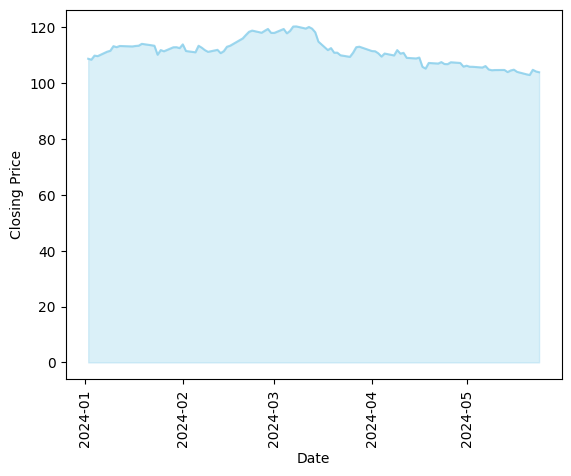

In [ ]:
## Plotting the closing price of a quried price

import matplotlib.pyplot as plt
plt.fill_between(df2.Date,df2.Close,color="skyblue",alpha=0.3)
plt.plot(df2.Date,df2.Close,color="skyblue",alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel('Closing Price')
plt.show()

In [ ]:
## Creating a custom function to make our life easier
import matplotlib.pyplot as plt
def price_plot(symbol):
  df2 = pd.DataFrame(data[symbol].Close)
  df2['Date']= df2.index
  plt.fill_between(df2.Date,df2.Close,color="skyblue",alpha=0.3)
  plt.plot(df2.Date,df2.Close,color="skyblue",alpha=0.8)
  plt.xticks(rotation=90)
  plt.title(symbol,fontweight='bold')
  plt.xlabel("Date",fontweight='bold')
  plt.ylabel('Closing Price',fontweight='bold')
  return plt.show()

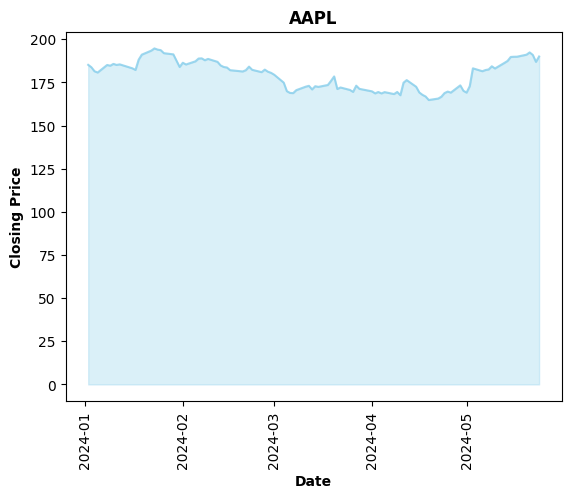

In [ ]:
price_plot("AAPL")